In [116]:
import pandas as pd

In [117]:
#都道府県・大都市の2010～2019の25～39歳転入超過数
#熊本市は除去
skiprows = list(range(0,11)) + list(range(12,158)) + [206,207,208,209,279,280,281,282,352,353,354,355,425,426,427,428,498,499,500,501,571,572,573,574,644,645,646,647,717,718,719,720,790,791,792,793,862,863,864,865] + list(range(886,2634))
usecols = [11,14,22,23,24]
tennyu_choka = pd.read_csv('都道府県・大都市_2010-2019_転入超過数.csv',
                           skiprows=skiprows,
                           usecols=usecols,
                           encoding='shift-jis')

In [118]:
tennyu_choka['25〜29歳'] = tennyu_choka['25〜29歳'].str.replace(',', '')
tennyu_choka['25〜29歳'] = pd.to_numeric(tennyu_choka['25〜29歳'], errors='coerce')
tennyu_choka['30〜34歳'] = tennyu_choka['30〜34歳'].str.replace(',', '')
tennyu_choka['30〜34歳'] = pd.to_numeric(tennyu_choka['30〜34歳'], errors='coerce')
tennyu_choka['35〜39歳'] = tennyu_choka['35〜39歳'].str.replace(',', '')
tennyu_choka['35〜39歳'] = pd.to_numeric(tennyu_choka['35〜39歳'], errors='coerce')

tennyu_choka['25～39歳の転入超過数'] = tennyu_choka['25〜29歳'] + tennyu_choka['30〜34歳'] + tennyu_choka['35〜39歳']

tennyu_choka = tennyu_choka.drop(columns=['25〜29歳'])
tennyu_choka = tennyu_choka.drop(columns=['30〜34歳'])
tennyu_choka = tennyu_choka.drop(columns=['35〜39歳'])

In [119]:
tennyu_choka_set = {name: group for name, group in tennyu_choka.groupby('時間軸（年次）')}

In [120]:
tennyu_choka_set['2010年'] = tennyu_choka_set['2010年'].rename(columns={'25～39歳の転入超過数':'2010'})
tennyu_choka_set['2011年'] = tennyu_choka_set['2011年'].rename(columns={'25～39歳の転入超過数':'2011'})
tennyu_choka_set['2012年'] = tennyu_choka_set['2012年'].rename(columns={'25～39歳の転入超過数':'2012'})
tennyu_choka_set['2013年'] = tennyu_choka_set['2013年'].rename(columns={'25～39歳の転入超過数':'2013'})
tennyu_choka_set['2014年'] = tennyu_choka_set['2014年'].rename(columns={'25～39歳の転入超過数':'2014'})
tennyu_choka_set['2015年'] = tennyu_choka_set['2015年'].rename(columns={'25～39歳の転入超過数':'2015'})
tennyu_choka_set['2016年'] = tennyu_choka_set['2016年'].rename(columns={'25～39歳の転入超過数':'2016'})
tennyu_choka_set['2017年'] = tennyu_choka_set['2017年'].rename(columns={'25～39歳の転入超過数':'2017'})
tennyu_choka_set['2018年'] = tennyu_choka_set['2018年'].rename(columns={'25～39歳の転入超過数':'2018'})
tennyu_choka_set['2019年'] = tennyu_choka_set['2019年'].rename(columns={'25～39歳の転入超過数':'2019'})

In [121]:
tennyu_choka = pd.merge(tennyu_choka_set['2010年'][['地域', '2010']], tennyu_choka_set['2011年'][['地域', '2011']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2012年'][['地域', '2012']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2013年'][['地域', '2013']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2014年'][['地域', '2014']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2015年'][['地域', '2015']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2016年'][['地域', '2016']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2017年'][['地域', '2017']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2018年'][['地域', '2018']], on='地域', how='left')
tennyu_choka = pd.merge(tennyu_choka, tennyu_choka_set['2019年'][['地域', '2019']], on='地域', how='left')

In [122]:
tennyu_choka['地域'] = tennyu_choka['地域'].str.replace('東京都特別区部', '東京都特別区')

In [123]:
tennyu_choka = tennyu_choka.set_index('地域')

In [124]:
tennyu_choka.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
地域,,,,,,,,,,
全国,0,0,0,0,0,0,0,0,0,0
北海道,-2244,406,-1240,-1874,-2451,-2422,-1491,-1659,-1958,-2262
青森県,-277,358,-205,-620,-837,-830,-640,-539,-893,-822
岩手県,170,517,753,460,235,-100,-227,-409,-550,-575
宮城県,-724,-1709,3453,2053,879,-345,-135,-542,-793,-1298


In [125]:
#都道府県・大都市の2010～2019のTFR
#熊本市は除去
#まず都道府県のみの2010～2019のTFRを作成し、ネット上にある大都市の2010～2019のTFRを追加することで作成
skiprows = list(range(0,13))
usecols = [5] + list(range(11,21))
tfr = pd.read_csv('都道府県_2010-2019_tfr.csv',
                  skiprows=skiprows,
                  usecols=usecols,
                  encoding='cp932')
tfr = tfr[['都道府県', '2010年', '2011年', '2012年', '2013年', '2014年', '2015年', '2016年', '2017年', '2019年']].head()

In [126]:
tfr = tfr.set_index('都道府県')
tfr.index.name = '地域'

In [ ]:
#政令指定都市（東京都特別区としては人口最多の世田谷区と最少の千代田区を採用）＋明石市
toukyoutotokubetuku = {'2010年':, '2011年':, '2012年':,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }

okayama = {'2010年':1.491, '2011年':1.504, '2012年':1.454, '2013年':1.507, '2014年':1.470, '2015年':1.501, '2016年':1.481, '2017年':1.484, '2018年':1.483, '2019年':1.427}

kitakyusyu = {'2010年':1.48, '2011年':1.53, '2012年':1.54,'2013年':1.55,'2014年':1.56, '2015年':1.59, '2016年':1.61, '2017年':1.60, '2018年':1.61, '2019年':1.52}

hukuoka = {'2010年':1.29, '2011年':1.26, '2012年':1.17, '2013年': ,'2014年': ,'2015年':, '2016年': ,'2017年':1.08, '2018年': ,'2019年': }


saitama = {'2010年':1.38, '2011年':1.26, '2012年':1.25, '2013年':1.31, '2014年':1.28, '2015年':1.42, '2016年':1.33, '2017年':1.33, '2018年':1.29, '2019年':1.28}

{'2010年': ,'2011年': ,'2012年': ,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }
{'2010年': ,'2011年': ,'2012年': ,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }
{'2010年': ,'2011年': ,'2012年': ,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }
{'2010年': ,'2011年': ,'2012年': ,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }
{'2010年': ,'2011年': ,'2012年': ,'2013年': ,'2014年': ,'2015年': ,'2016年': ,'2017年': ,'2018年': ,'2019年': }

In [127]:
tennyu_choka.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
地域,,,,,,,,,,
全国,0,0,0,0,0,0,0,0,0,0
北海道,-2244,406,-1240,-1874,-2451,-2422,-1491,-1659,-1958,-2262
青森県,-277,358,-205,-620,-837,-830,-640,-539,-893,-822
岩手県,170,517,753,460,235,-100,-227,-409,-550,-575
宮城県,-724,-1709,3453,2053,879,-345,-135,-542,-793,-1298


In [128]:
tfr.tail()

,2010年,2011年,2012年,2013年,2014年,2015年,2016年,2017年,2019年
地域,,,,,,,,,
全国,1.39,1.39,1.41,1.43,1.42,1.45,1.44,1.43,1.36
北海道,1.26,1.25,1.26,1.28,1.27,1.31,1.29,1.29,1.24
青森県,1.38,1.38,1.36,1.40,1.42,1.43,1.48,1.43,1.38
岩手県,1.46,1.41,1.44,1.46,1.44,1.49,1.45,1.47,1.35
宮城県,1.30,1.25,1.30,1.34,1.30,1.36,1.35,1.31,1.23


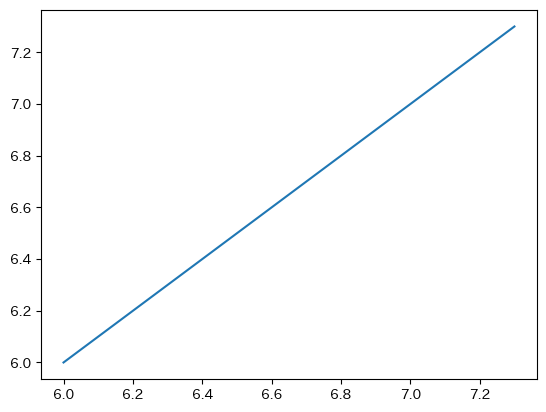

In [102]:
import matplotlib.pyplot as plt
import japanize_matplotlib

selected_low = birth_rate.loc['北海道']
plt.plot(selected_low, selected_low.values)
plt.show()

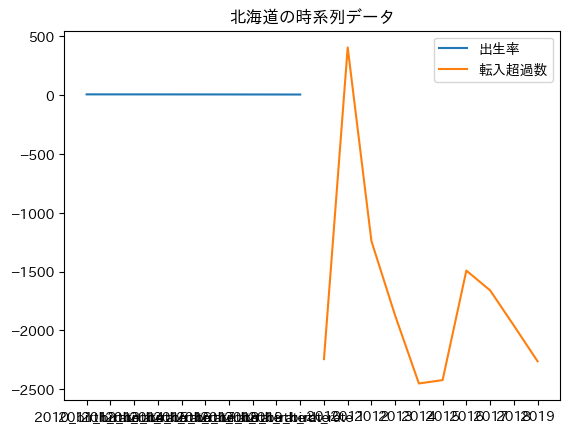

In [103]:
import matplotlib.pyplot as plt
import japanize_matplotlib

area = '北海道'
y1 = birth_rate.loc[area]
y2 = tennyu_choka.loc[area]
plt.plot(y1.index, y1.values, label='出生率')
plt.plot(y2.index, y2.values, label='転入超過数')
plt.legend()
plt.title(f'{area}の時系列データ')
plt.show()